## Exploratory Data Analysis & Price prediction using automobile dataset from Kaggle
###### https://www.kaggle.com/toramky/automobile-dataset

### Import modules that will be used

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Import the dataset

In [49]:
# Function provided by pandas to import csv data 
dataset = pd.read_csv('Automobile_data.csv', na_values='?') # Consider all "?" as null values
dataset.head(3) # Preview top three rows of the data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


## Preprocess data

Any exploratory Data Analysis and Machine Learning tasks should always be starting with some data preprocessing for an optimized result

#### The pandas function below is very important to see how pandas interpreted the entries data type

In [101]:
dataset.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### I want to identify all columns that contain null value to deal with

In [55]:
list(dataset.columns[dataset.isna().any()])

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

#### A basic way to deal with missing numbers is to put in the average value of the entire attribute

In [98]:
dataset['normalized-losses'].replace(np.nan, dataset['normalized-losses'].mean(), inplace=True)
dataset['bore'].replace(np.nan, dataset['bore'].mean(), inplace=True)
dataset['stroke'].replace(np.nan, dataset['stroke'].mean(), inplace=True)
dataset['horsepower'].replace(np.nan, dataset['horsepower'].mean(), inplace=True)
dataset['peak-rpm'].replace(np.nan, dataset['peak-rpm'].mean(), inplace=True)
dataset['price'].replace(np.nan, dataset['price'].mean(), inplace=True)
dataset.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


#### One way to deal with missing categorical value is to put in the most frequent one

In [97]:
dataset['num-of-doors'].replace(np.nan, dataset['num-of-doors'].mode()[0], inplace = True)
dataset.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [143]:
# split_equally_by_four = np.linspace(dataset['price'].min(), dataset['price'].max(), 5)
# price_categories = ['low', 'medium', 'pretty high', 'high']
# categorized = pd.cut(dataset['price'], split_equally_by_four, labels=price_categories, include_lowest=True)

## Let's ask a question : 
> *what is the average price given a fuel type with respect to each body style ?*

### We have to wrangle the data in order to answer that question

In [170]:
# Retrieve the needed columns
sub_data = dataset[['fuel-type', 'body-style', 'price']]
average_mean = sub_data.groupby(['fuel-type', 'body-style'], as_index=False).mean()

# Read the result in an easier way by pivoting the answer
pivot_data = average_mean.pivot(index='fuel-type', columns='body-style')
pivot_data

price                                                   
body-style convertible  hardtop     hatchback         sedan         wagon
fuel-type                                                                
diesel             NaN  28176.0   7788.000000  14774.400000  19727.666667
gas            21890.5  21356.0  10083.076213  14370.558749  11368.909091

> ***Interestingly, we can conclude from the data aggregation above that:*** 

>> *  A diesel convertible car does not exist in this dataset.

>> *  A convertible gasoline is the most expensive car.

>> *  A hatchback diesel is the cheapest one.

**We can visualize the pivot data to get more intuition about the relationships between the fuel type, body style and the price**

<AxesSubplot:xlabel='None-body-style', ylabel='fuel-type'>

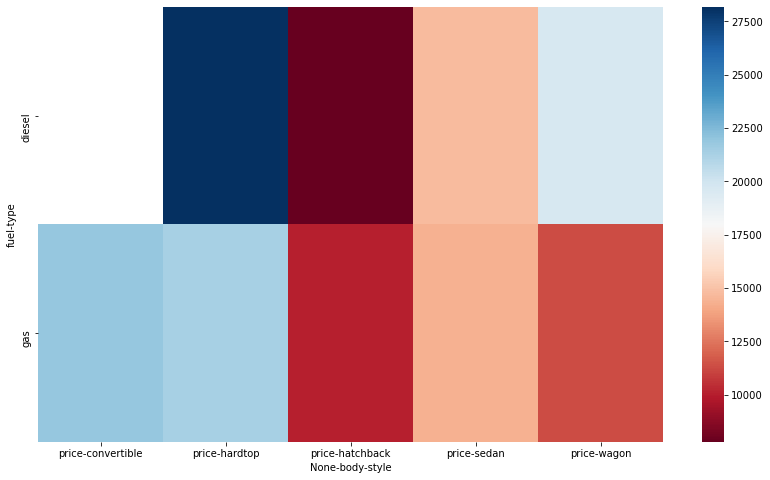

In [178]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot_data, cmap='RdBu')

> **Yet, interestingly:** It's easier now to see which type of car based on *two attributes* (the body style and fuel type) gauged by the bar color on the right hand side from the heatmap above is the most expensive, the cheapest and at medium price one.

## Finding attributes correlation

**Note:** *correlation does not imply causation* 
> If like me you want more info about this, please visit:

>https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation#:~:text=The%20phrase%20%22correlation%20does%20not,association%20or%20correlation%20between%20them.

In [130]:
# List all attributes in our dataset
list(dataset.columns)

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

##### Let's try to see a correlation between the engine size and the price of a car

<AxesSubplot:xlabel='engine-size', ylabel='price'>

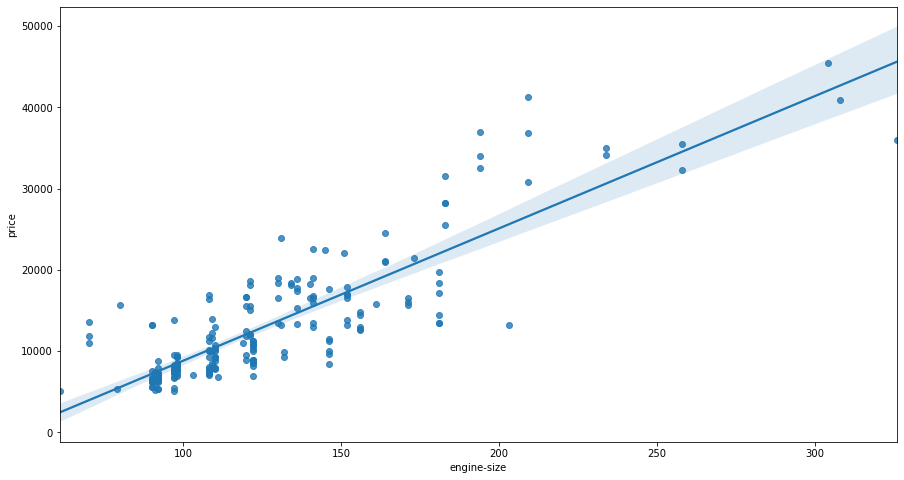

In [138]:
plt.figure(figsize=(15,8))
sns.regplot(x="engine-size", y="price", data=dataset)

> **As we could see from the graph above, there is a positive correlation between the engine-size and the price of a car**

#### Now let's see a correlation between the highway miles per gallon and the price

(0.0, 48106.724922213085)

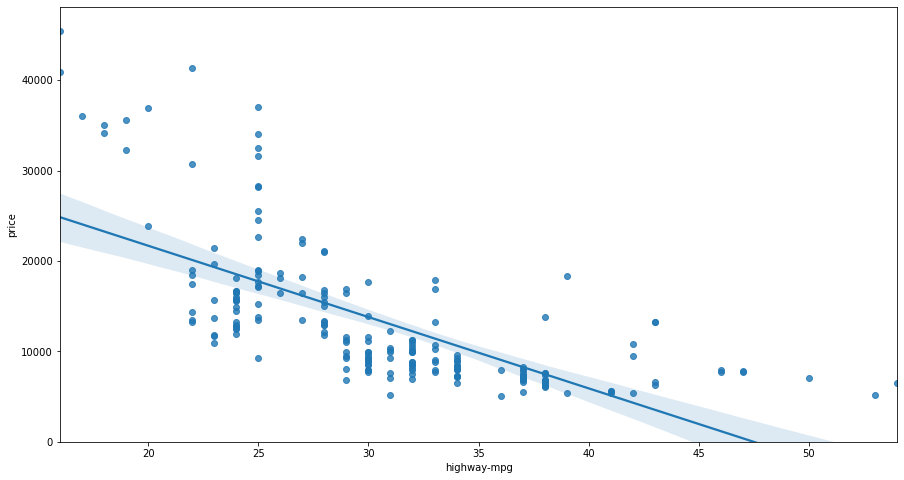

In [142]:
plt.figure(figsize=(15,8))
sns.regplot(x="highway-mpg", y="price", data=dataset)
plt.ylim(0, )

> **As we could see from the graph above, the highway miles per gallon and the price are negatively correlated**